In [1]:
#pip install keras
import tensorflow as tf
tf.__version__
from keras.preprocessing.image import ImageDataGenerator

In [2]:
data_training = ImageDataGenerator(rescale=1./255,
                                  horizontal_flip = True)
training_data = data_training.flow_from_directory('dataset/training_set',
                                                 target_size = (64,64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [3]:
data_test = ImageDataGenerator(rescale=1./255)
test_data = data_test.flow_from_directory('dataset/test_set',
                                         target_size = (64,64),
                                         batch_size = 32,
                                         class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [14]:
from matplotlib import pyplot
import numpy as np
from keras.preprocessing import image
%matplotlib inline

In [ ]:
# import numpy as np
# from keras.models import Sequential
# from keras.layers import AveragePooling2D
# average pooling and max pooling example
# # define input image
# image = np.array([
#         [2, 2, 7, 3],
# 				[9, 4, 6, 1],
# 				[8, 5, 2, 4],
# 				[3, 1, 2, 6]])
# image = image.reshape(1, 4, 4, 1)
# image = image.astype(np.float32)
# # define model containing just a single average pooling layer
# model = Sequential([tf.keras.layers.AveragePooling2D(pool_size=2, strides=2)])

# # generate pooled output
# output = model.predict(image)

# # print output image
# output = np.squeeze(output)
# print(output)

In [6]:
#defining the models sequential then we will add layers to the model
cnn = tf.keras.models.Sequential()
# 1.convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,                            # filter means how many output convolutional matrix do you want
                               kernel_size = 3,                       # size of filter matrix ( must be an odd like 3*3 , 5*5 etc.)
                               kernel_initializer = 'glorot_uniform', # initialize all the value before training, another method 'he_uniform'
                               activation = 'relu',                   # activation function to remove linearity form dataset otherwise CNN simply work as a linear regression
                               padding = 'same',                      # padding same means input matrix size is same as output matrix size, 
                               input_shape = [64,64,3]))              # it will add layers of 0 at the border of the image to preserve the information of border and edges.
                                                                      # input shape of image 64 height,64 width and 3 for colour
# 2.pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, # used to reduce the dimentions of convolutional matrix
                                               # take 2*2 array from first position 
                                  strides=2))  # strides=2 means take another 2*2 matrix but move 2 steps right from previous postion
# 3.adding second layer
cnn.add(tf.keras.layers.Conv2D(filters=64,
                               kernel_size = 3,
                               padding = 'same',
                               kernel_initializer = 'glorot_uniform',
                               activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,
                                  strides=2))

In [7]:
# flattening layer
cnn.add(tf.keras.layers.Flatten()) # convert 2D array into single long continuous linear vector

In [8]:
# adding full connection
cnn.add(tf.keras.layers.Dense(units=128, activation = 'relu'))

In [9]:
# adding output layer
cnn.add(tf.keras.layers.Dense(units=1, activation = 'sigmoid')) # sigmoid activation where we have binary classification
                                                                # softmax for multiple class classification

In [10]:
cnn.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics = ['accuracy'])

In [16]:
history = cnn.fit(x = training_data, validation_data = test_data, epochs = 25)

Epoch 1/25
250/250 [==============================] - 51s 205ms/step - loss: 0.0207 - accuracy: 0.9933 - val_loss: 1.1420 - val_accuracy: 0.7760
Epoch 2/25
250/250 [==============================] - 58s 231ms/step - loss: 0.0368 - accuracy: 0.9879 - val_loss: 1.2081 - val_accuracy: 0.7835
Epoch 3/25
250/250 [==============================] - 65s 261ms/step - loss: 0.0196 - accuracy: 0.9935 - val_loss: 1.2396 - val_accuracy: 0.7860
Epoch 4/25
250/250 [==============================] - 63s 250ms/step - loss: 0.0128 - accuracy: 0.9960 - val_loss: 1.3902 - val_accuracy: 0.7965
Epoch 5/25
250/250 [==============================] - 60s 240ms/step - loss: 0.0160 - accuracy: 0.9955 - val_loss: 1.3126 - val_accuracy: 0.7820
Epoch 6/25
250/250 [==============================] - 61s 244ms/step - loss: 0.0242 - accuracy: 0.9921 - val_loss: 1.3089 - val_accuracy: 0.7765
Epoch 7/25
250/250 [==============================] - 60s 240ms/step - loss: 0.0250 - accuracy: 0.9910 - val_loss: 1.4392 - val_ac

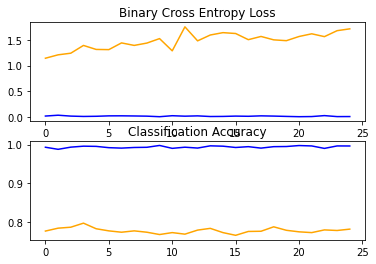

In [17]:
pyplot.subplot(211)
pyplot.title('Binary Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
 # plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')

In [27]:
# check our model
from keras.preprocessing import image
test_image = tf.keras.utils.load_img('dataset/pexels-pixabay-45201.jpg', target_size = (64,64)) #load testing image and check weather its a dog or cat
                                                                                                # and size must be same as target_size before
test_image = tf.keras.utils.img_to_array(test_image) #convert image into numpy array
test_image =np.expand_dims(test_image,axis = 0)
result = cnn.predict(test_image)
print(result)
# training_data.class_indices
if result[0][0] == 1:
    pred = 'dog'
else:
    pred = 'cat'
print("this is a ",pred)

1/1 [==============================] - 0s 16ms/step
[[0.]]
this is a  cat
